In [ ]:
import matplotlib.pyplot as plt

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [ ]:
from skimage import io
import numpy as np
import scipy
from scipy.integrate import odeint
import decimal

def modelFunction(capol, crpol):
    
    # Parameter definition

    rnapol = 1. # Concentration of RNA polymerase; We assume that it will always saturate the system
    tf_a = 2. # Concentration of activator; We assume that the system will be saturated with TF_A once DEX saturates the system
    tf_r = 4. # Concentration of repressor
    dmrna = 2.5 # Degradation rate of messenger RNA (mRNA)
    dprot = 2. # Degradation rate of the protein
    k_pol = 2. # Binding rate of RNA polymerase to DNA
    k_transcription = 200. # Transcription rate constant
    k_translation = 55. # Translation rate constant
    capol = capol # Cooperativity parameter between activator (TF_A) and DNA (must be 1 or higher for activation behaviour)
    crpol = crpol # Cooperativity parameter between repressor (TF_R) and DNA (must be 1 or lower for repression behaviour)
    ka = 1. # Binding rate of the activator (TF_A) to DNA
    kr = 1. # Binding rate of the repressor (TF_R) to DNA
    n = 4. # Number of boxes available for binding of the activator (TF_A)
    m = 3. # Number of boxes available for binding of the repressor (TF_R)
    phi = rnapol*k_pol*(((tf_a*ka*capol + 1)**n - 1)*(tf_r*kr*crpol + 1)**m)/(((tf_a*ka + 1)**n)*((tf_r*kr + 1)**m) + k_pol*rnapol*((tf_a*ka*capol + 1)**n)*((tf_r*kr*crpol + 1)**m))

    Dt = 0.01 # Timestep to use

    # Initial Conditions

    def initialize():

        global \
        t, venus_mrna, venus_prot, venus_mrna_results, venus_prot_results, timesteps

        # Initial Conditions for the system

        t = 0.
        venus_mrna = 0.
        venus_prot = 0.

        # Result Arrays

        venus_mrna_results = [venus_mrna]
        venus_prot_results = [venus_prot]
        timesteps = [t]

    # Observe Function

    def observe():

        global \
        t, venus_mrna, venus_prot, venus_mrna_results, venus_prot_results, timesteps

        venus_mrna_results.append(venus_mrna)
        venus_prot_results.append(venus_prot)
        timesteps.append(t)

    # Update Function

    def update():

        global \
        t, venus_mrna, venus_prot, venus_mrna_results, venus_prot_results, timesteps

        next_venus_mrna = (venus_mrna + Dt*(phi*k_transcription - dmrna*venus_mrna))
        next_venus_prot = (venus_prot + Dt*(venus_mrna*k_translation - dprot*venus_prot))

        venus_mrna, venus_prot = next_venus_mrna, next_venus_prot
        t = t + Dt

    # INITIALIZE AND UPDATE THE ODEs

    initialize()
    while t < 20:    
        update()
        observe()
        
    unique_results = {}
    unique_results['VenusRNA'] = venus_mrna_results
    unique_results['VenusPROT'] = venus_prot_results
    unique_results['Timesteps'] = timesteps
    
    return unique_results

In [ ]:
varying_capol = []
capol_value = []

for i in np.arange(1., 2.25, 0.25):
    
    crpol = 0.5
    function = modelFunction(i, crpol)
    varying_capol.append([function['VenusRNA'], function['VenusPROT'], function['Timesteps']])
    capol_value.append(round(i,2))

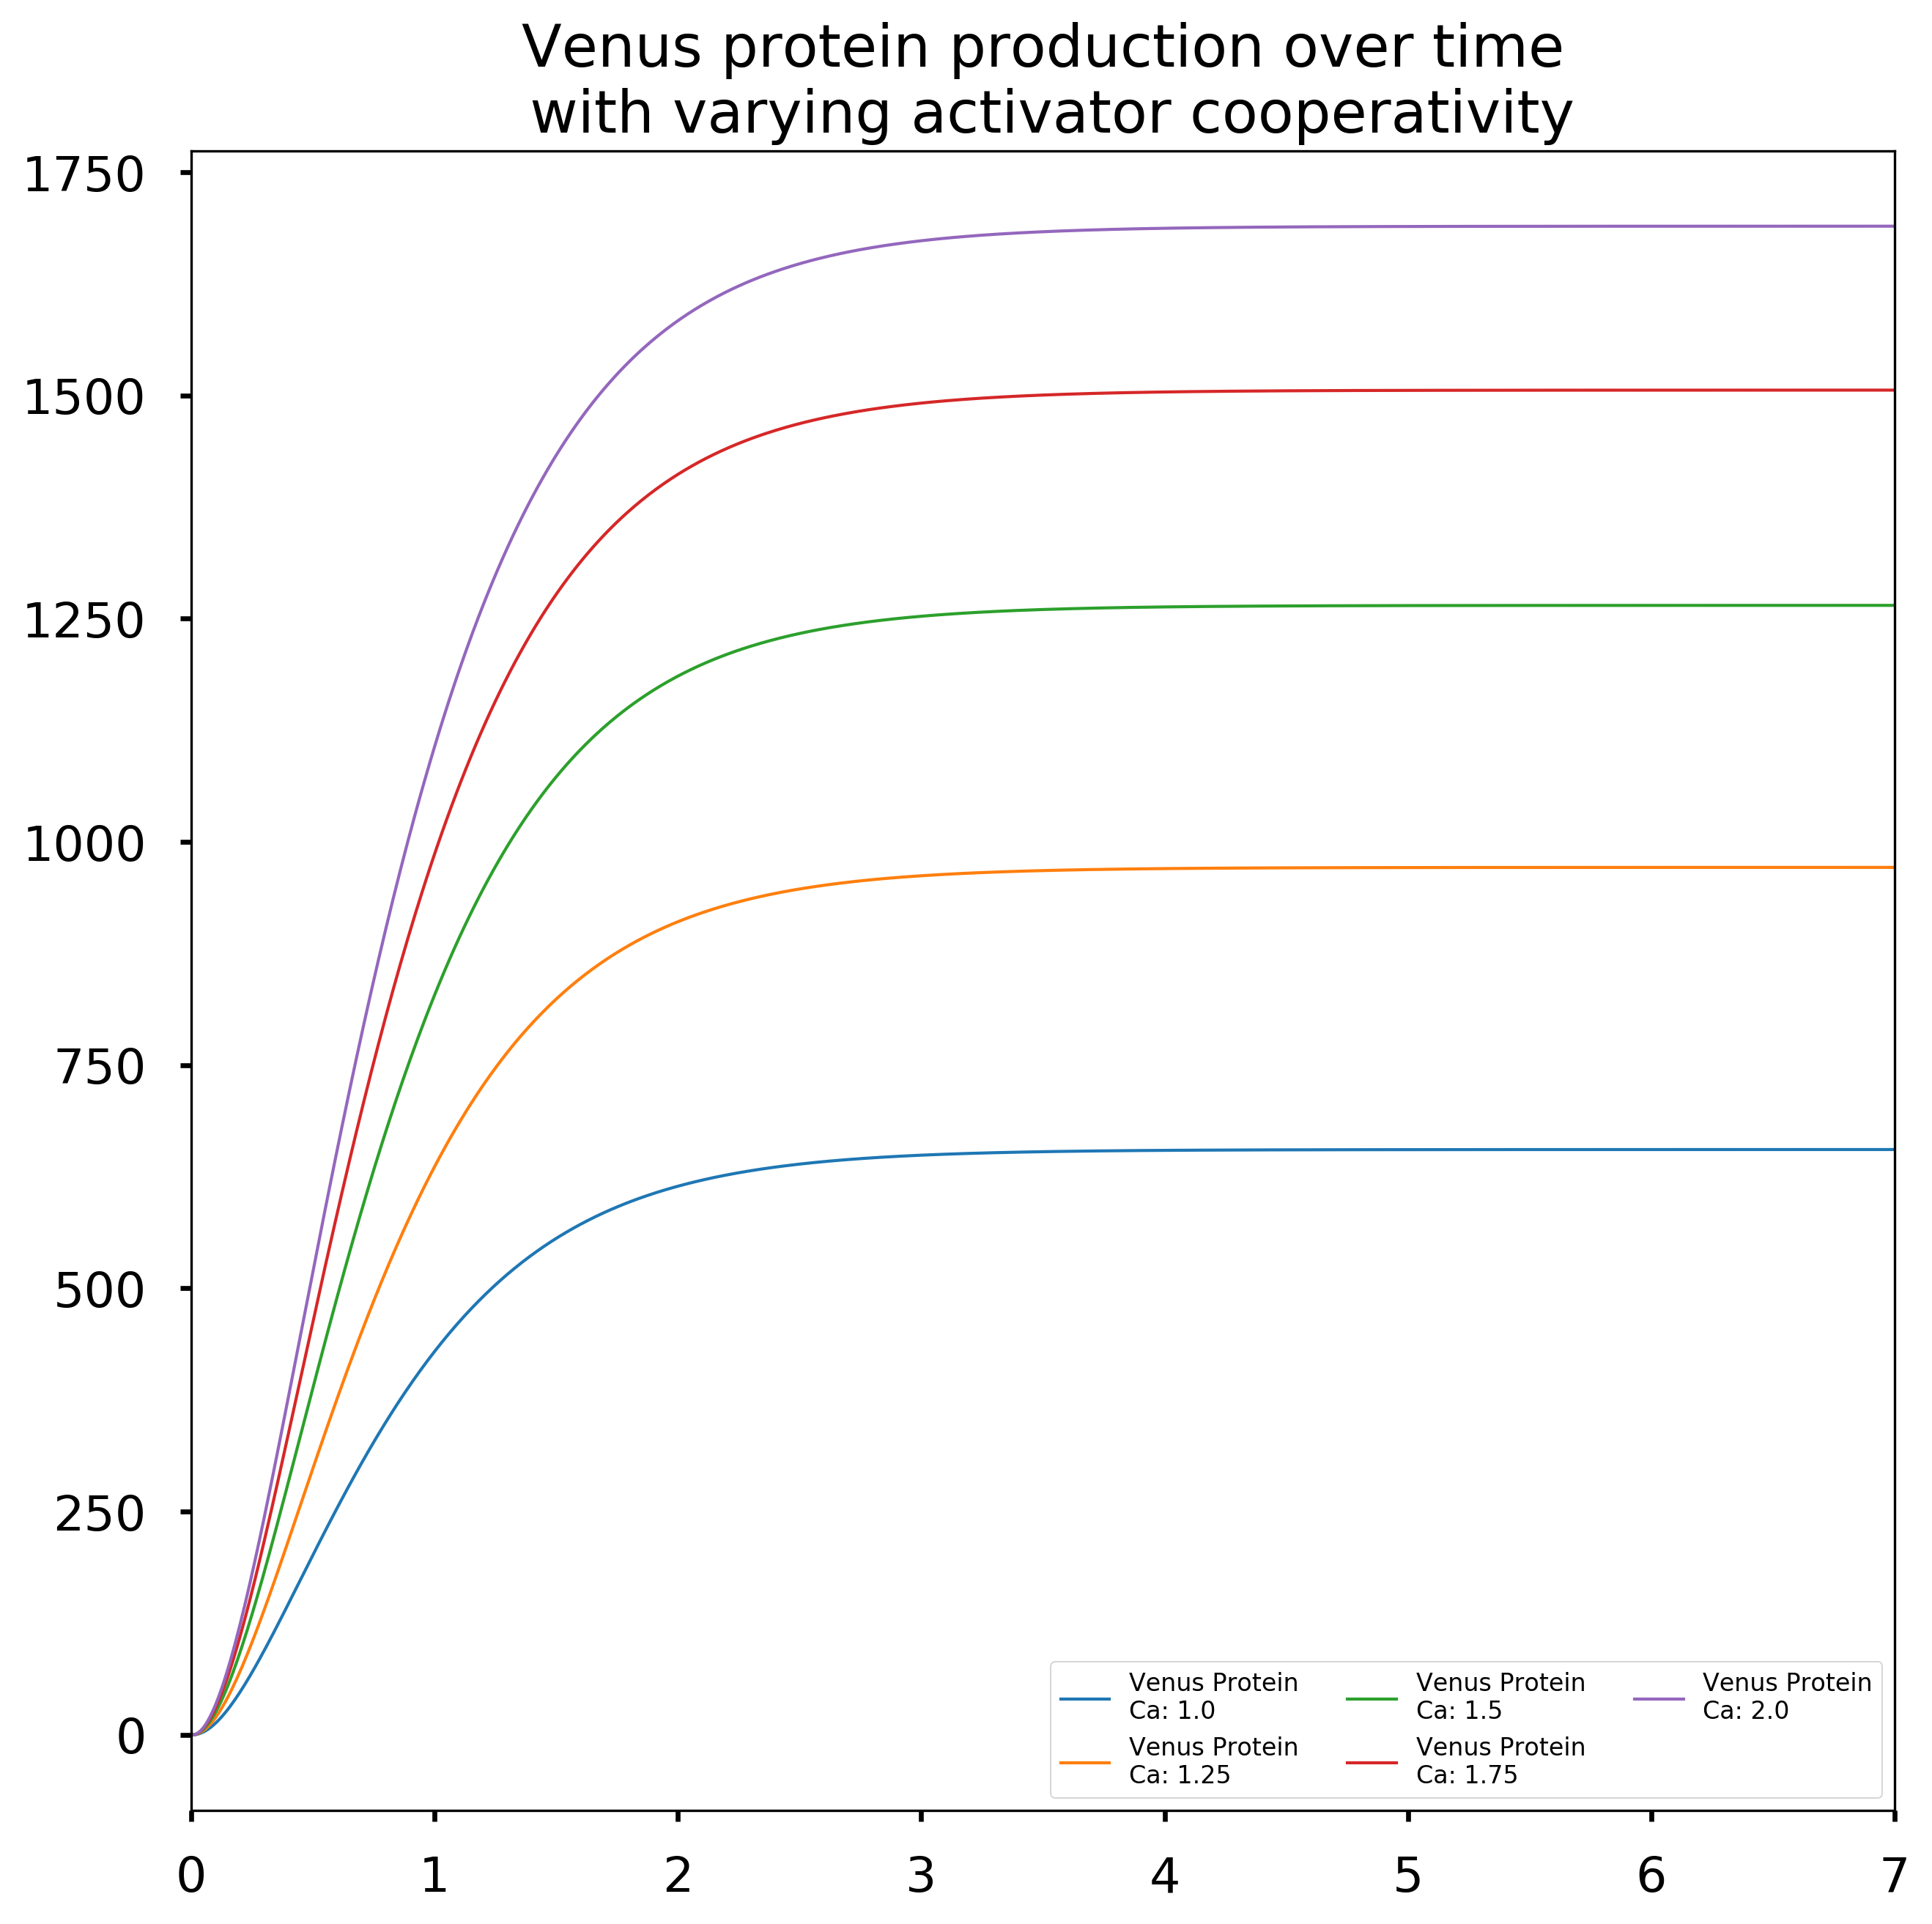

In [ ]:
plt.style.use('seaborn-poster')
plt.figure(figsize=(10,10), dpi=300)
plt.title('Venus protein production over time\n with varying activator cooperativity')

for i in range(0, len(varying_capol)):
    
    #plt.plot(varying_capol[i][2], varying_capol[i][0], label='Ca:{}'.format(capol_value[i]), lw=1.0)
    plt.plot(varying_capol[i][2], varying_capol[i][1], label='Venus Protein\nCa: {}'.format(capol_value[i]), lw=1.0)
    
plt.xlim(0, 7)
plt.legend(ncol=3, prop={'size': 8})
plt.savefig('capol_variation.pdf')

In [ ]:
varying_crpol = []
crpol_value = []

for i in np.arange(0.1, 1, 0.2):
    
    capol = 1.2
    function = modelFunction(capol, i)
    varying_crpol.append([function['VenusRNA'], function['VenusPROT'], function['Timesteps']])
    crpol_value.append(round(i,2))

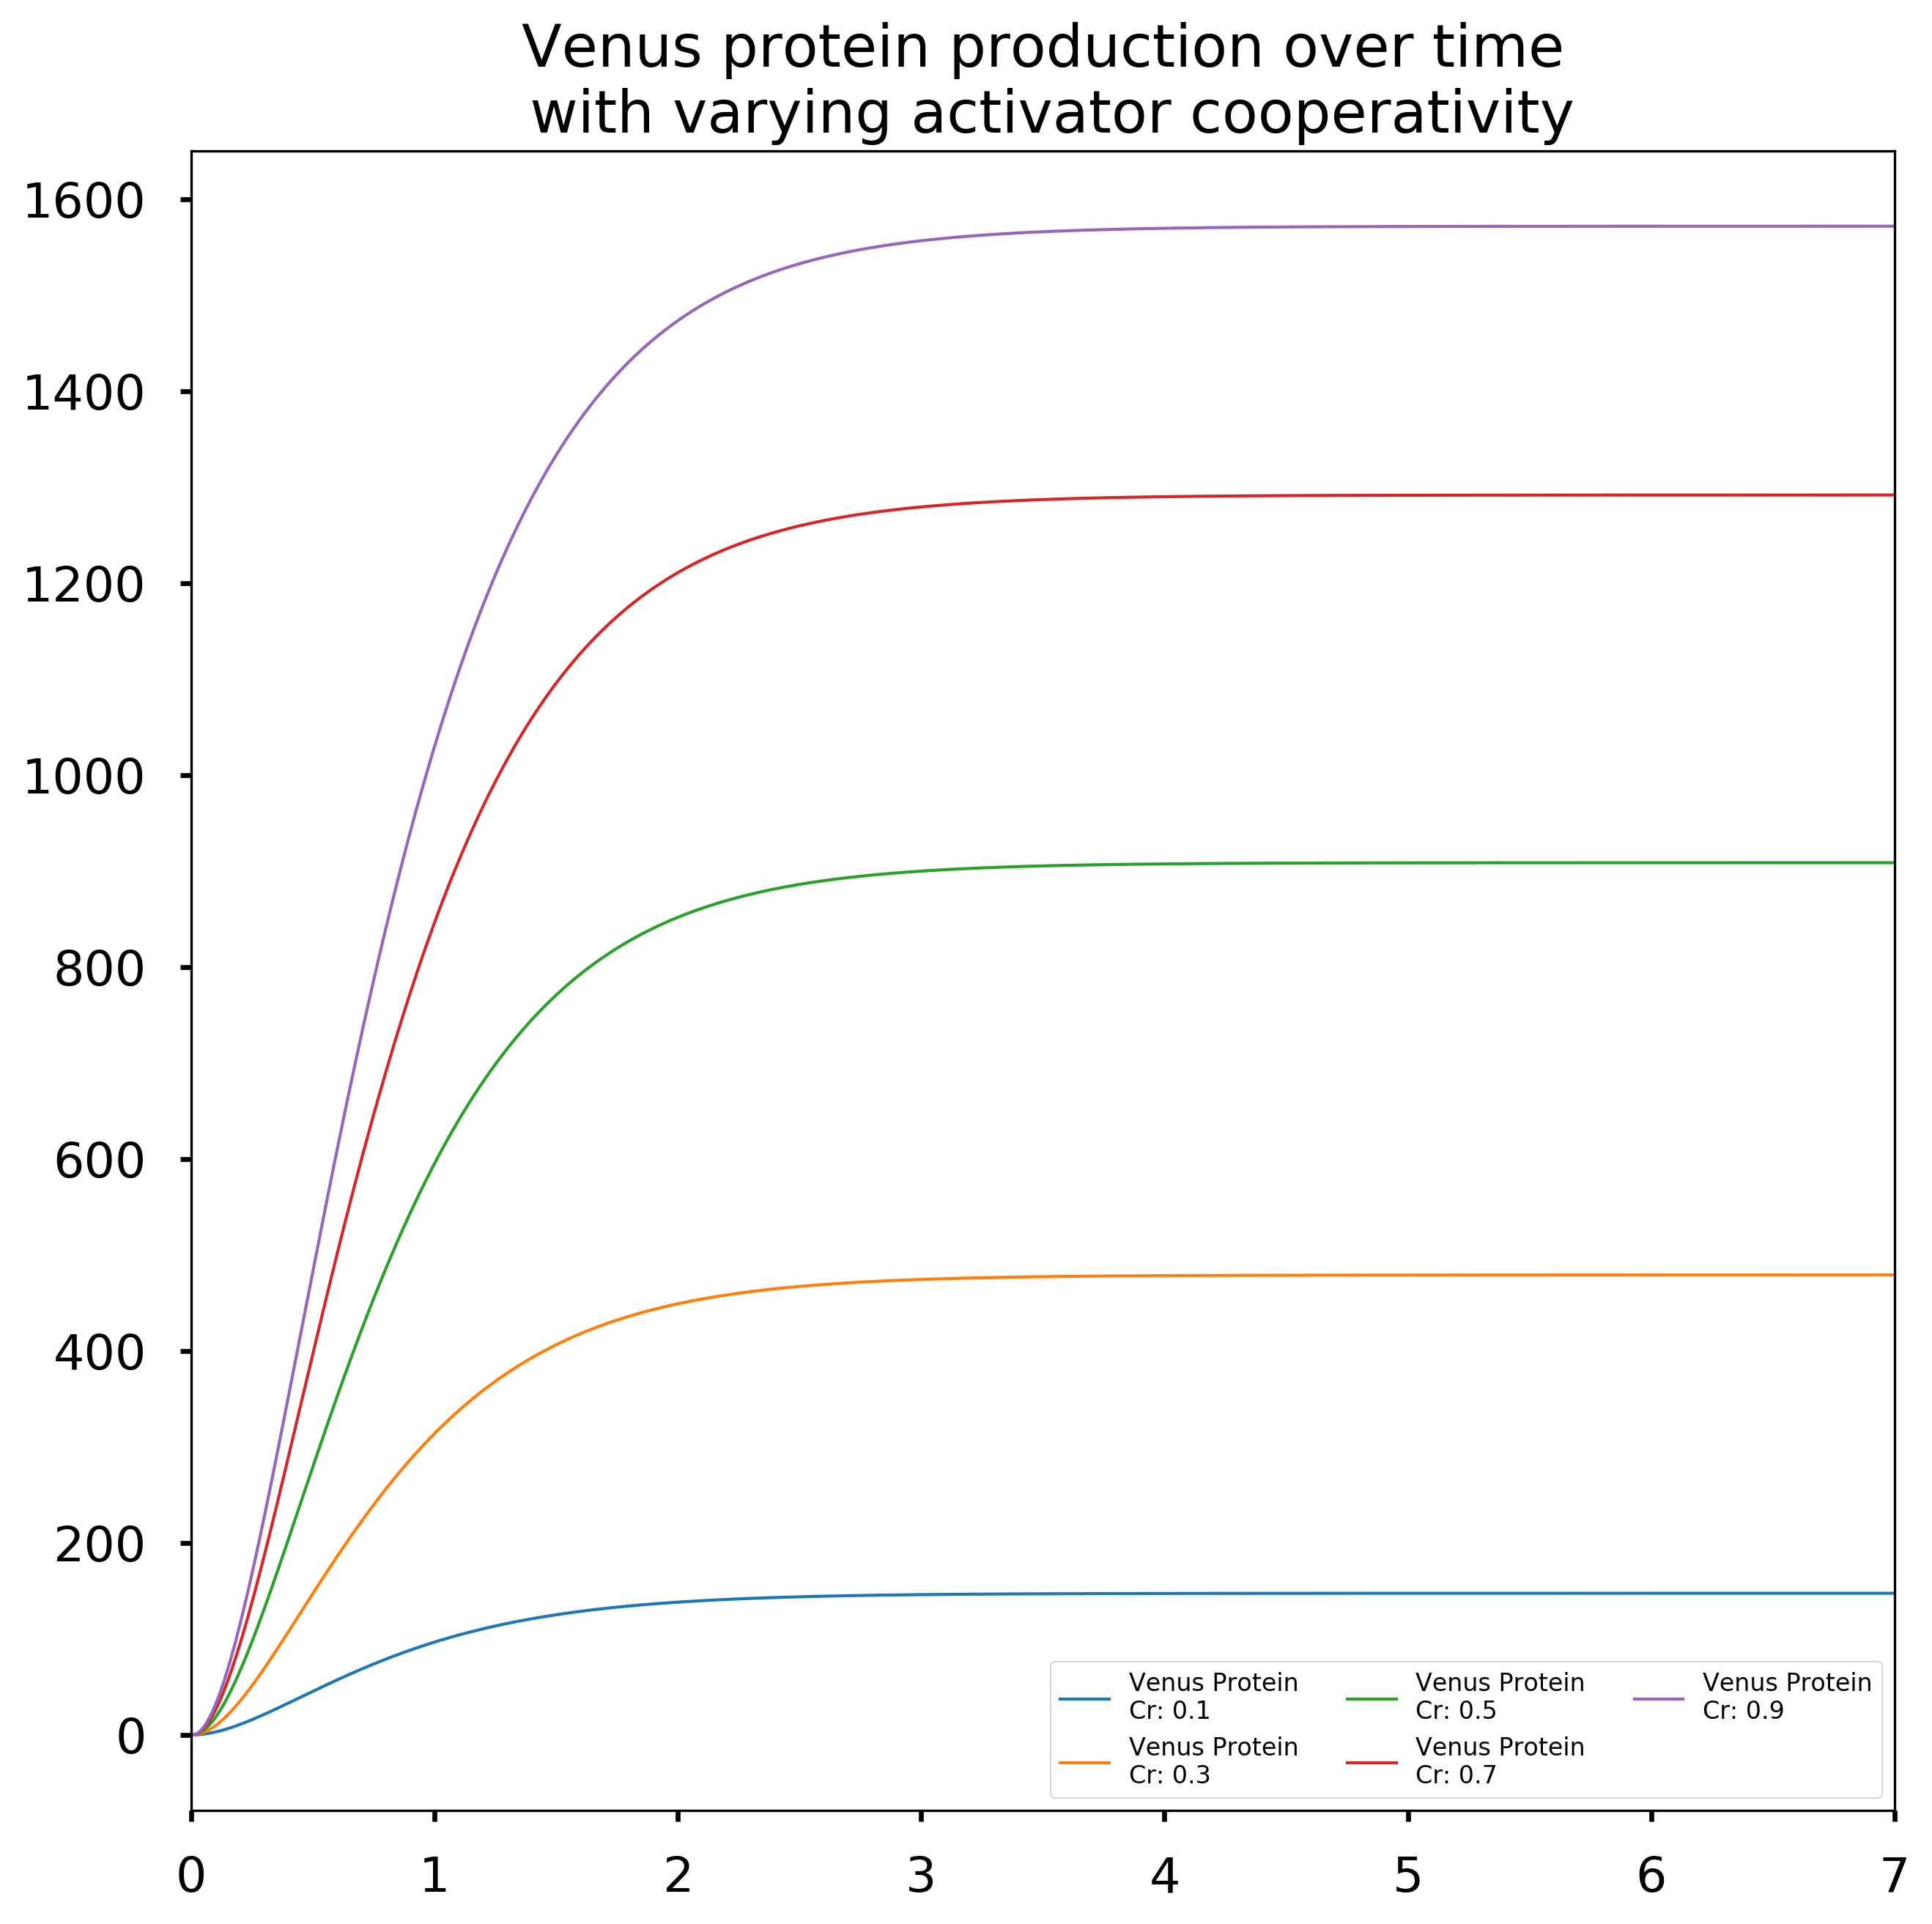

In [ ]:
plt.style.use('seaborn-poster')
plt.figure(figsize=(10,10), dpi=300)
plt.title('Venus protein production over time\n with varying activator cooperativity')

for i in range(0, len(varying_crpol)):
    
    #plt.plot(varying_capol[i][2], varying_capol[i][0], label='Ca:{}'.format(capol_value[i]), lw=1.0)
    plt.plot(varying_crpol[i][2], varying_crpol[i][1], label='Venus Protein\nCr: {}'.format(crpol_value[i]), lw=1.0)
    
plt.xlim(0, 7)
plt.legend(ncol=3, prop={'size': 8})
plt.savefig('crpol_variation.pdf')

In [ ]:
varying_crpol[0][1][-1]

147.47732686267398